# CS-C3250 - Data Science Project: Predicting Housing Prices in One Year
__Sponsored by OP bank__

## Exploratory Data Analysis

Importing necessary libraries.

In [28]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.impute import KNNImputer

Reading the data.

In [29]:
df = pd.read_csv("quarterly_data.csv", encoding = 'unicode_escape')
df.head()

,Postal code,Building type,2010Q1 Price per square meter (EUR/m2),2010Q2 Price per square meter (EUR/m2),2010Q3 Price per square meter (EUR/m2),2010Q4 Price per square meter (EUR/m2),2011Q1 Price per square meter (EUR/m2),2011Q2 Price per square meter (EUR/m2),2011Q3 Price per square meter (EUR/m2),2011Q4 Price per square meter (EUR/m2),...,2019Q1 Price per square meter (EUR/m2),2019Q2 Price per square meter (EUR/m2),2019Q3 Price per square meter (EUR/m2),2019Q4 Price per square meter (EUR/m2),2020Q1 Price per square meter (EUR/m2),2020Q2 Price per square meter (EUR/m2),2020Q3 Price per square meter (EUR/m2),2020Q4 Price per square meter (EUR/m2),2021Q1* Price per square meter (EUR/m2),2021Q2* Price per square meter (EUR/m2)
0,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, one-room flat",5458,5347,5826,5566,5545,5812,5909,5856,...,7755,8332,8130,8068,7802,8543,9170,7517,8872,8596
1,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, two-room flat",5164,5021,5081,5006,5713,5866,5552,5614,...,6914,7694,6901,7435,7573,7398,7868,7700,7829,7974
2,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),"Blocks of flats, three-room flat+",4944,5396,4828,5394,5571,5709,5450,5010,...,6883,6846,7379,6728,7205,6678,7178,7405,8053,8174
3,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Blocks of flats total,5168,5219,5181,5269,5632,5807,5630,5511,...,7043,7478,7476,7345,7460,7275,8058,7540,8188,8188
4,00100 Helsinki Keskusta - Etu-Töölö (Helsinki ),Terraced houses total,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


Transform location description to only postal code

In [30]:
codes = df.iloc[:,0].apply(lambda x: x[:5])

Getting indicies and column names

In [31]:
indices = pd.MultiIndex.from_arrays((codes, df.iloc[:,1]))
columns = df.iloc[:,2:].columns
df1 = pd.DataFrame(df.iloc[:,2:].to_numpy(), index=indices, columns=columns)

Force cell values to numeric type, in the process turning non-numeric cells (e.g. "..") to NaN values.

In [32]:
df1 = df1.apply(pd.to_numeric, errors="coerce", downcast="integer")
df1.head()

2010Q1 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5458.0   
            Blocks of flats, two-room flat                                     5164.0   
            Blocks of flats, three-room flat+                                  4944.0   
            Blocks of flats total                                              5168.0   
            Terraced houses total                                                 NaN   

                                               2010Q2 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5347.0   
            Blocks of flats, two-room flat                                     5021.0   
            Blocks of flats, three-room flat+                                  5396.0   
            Blocks of flats total                                              5219.0   
            Terraced houses total                                                 NaN   

                                               2010Q3 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5826.0   
            Blocks of flats, two-room flat                                     5081.0   
            Blocks of flats, three-room flat+                                  4828.0   
            Blocks of flats total                                              5181.0   
            Terraced houses total                                                 NaN   

                                               2010Q4 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5566.0   
            Blocks of flats, two-room flat                                     5006.0   
            Blocks of flats, three-room flat+                                  5394.0   
            Blocks of flats total                                              5269.0   
            Terraced houses total                                                 NaN   

                                               2011Q1 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5545.0   
            Blocks of flats, two-room flat                                     5713.0   
            Blocks of flats, three-room flat+                                  5571.0   
            Blocks of flats total                                              5632.0   
            Terraced houses total                                                 NaN   

                                               2011Q2 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5812.0   
            Blocks of flats, two-room flat                                     5866.0   
            Blocks of flats, three-room flat+                                  5709.0   
            Blocks of flats total                                              5807.0   
            Terraced houses total                                                 NaN   

                                               2011Q3 Price per square meter (EUR/m2)  \
Postal code Building type                                                               
00100       Blocks of flats, one-room flat                                     5909.0   
            Blocks of flats, two-roo

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10074 entries, ('00100', 'Blocks of flats, one-room flat') to ('99980', 'Building types total')
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   2010Q1 Price per square meter (EUR/m2)   1608 non-null   float64
 1   2010Q2 Price per square meter (EUR/m2)   1703 non-null   float64
 2   2010Q3 Price per square meter (EUR/m2)   1637 non-null   float64
 3   2010Q4 Price per square meter (EUR/m2)   1604 non-null   float64
 4   2011Q1 Price per square meter (EUR/m2)   1645 non-null   float64
 5   2011Q2 Price per square meter (EUR/m2)   1691 non-null   float64
 6   2011Q3 Price per square meter (EUR/m2)   1673 non-null   float64
 7   2011Q4 Price per square meter (EUR/m2)   1398 non-null   float64
 8   2012Q1 Price per square meter (EUR/m2)   1557 non-null   float64
 9   2012Q2 Price per square meter (EUR/m2)   1686 

Transposing the data for other needs.

In [34]:
dfT = df1.T
dfT.head()

Postal code                                                     00100  \
Building type                          Blocks of flats, one-room flat   
2010Q1 Price per square meter (EUR/m2)                         5458.0   
2010Q2 Price per square meter (EUR/m2)                         5347.0   
2010Q3 Price per square meter (EUR/m2)                         5826.0   
2010Q4 Price per square meter (EUR/m2)                         5566.0   
2011Q1 Price per square meter (EUR/m2)                         5545.0   

Postal code                                                            \
Building type                          Blocks of flats, two-room flat   
2010Q1 Price per square meter (EUR/m2)                         5164.0   
2010Q2 Price per square meter (EUR/m2)                         5021.0   
2010Q3 Price per square meter (EUR/m2)                         5081.0   
2010Q4 Price per square meter (EUR/m2)                         5006.0   
2011Q1 Price per square meter (EUR/m2)                         5713.0   

Postal code                                                               \
Building type                          Blocks of flats, three-room flat+   
2010Q1 Price per square meter (EUR/m2)                            4944.0   
2010Q2 Price per square meter (EUR/m2)                            5396.0   
2010Q3 Price per square meter (EUR/m2)                            4828.0   
2010Q4 Price per square meter (EUR/m2)                            5394.0   
2011Q1 Price per square meter (EUR/m2)                            5571.0   

Postal code                                                   \
Building type                          Blocks of flats total   
2010Q1 Price per square meter (EUR/m2)                5168.0   
2010Q2 Price per square meter (EUR/m2)                5219.0   
2010Q3 Price per square meter (EUR/m2)                5181.0   
2010Q4 Price per square meter (EUR/m2)                5269.0   
2011Q1 Price per square meter (EUR/m2)                5632.0   

Postal code                                                   \
Building type                          Terraced houses total   
2010Q1 Price per square meter (EUR/m2)                   NaN   
2010Q2 Price per square meter (EUR/m2)                   NaN   
2010Q3 Price per square meter (EUR/m2)                   NaN   
2010Q4 Price per square meter (EUR/m2)                   NaN   
2011Q1 Price per square meter (EUR/m2)                   NaN   

Postal code                                                  \
Building type                          Building types total   
2010Q1 Price per square meter (EUR/m2)               5168.0   
2010Q2 Price per square meter (EUR/m2)               5219.0   
2010Q3 Price per square meter (EUR/m2)               5181.0   
2010Q4 Price per square meter (EUR/m2)               5269.0   
2011Q1 Price per square meter (EUR/m2)               5632.0   

Postal code                                                     00120  \
Building type                          Blocks of flats, one-room flat   
2010Q1 Price per square meter (EUR/m2)                         5515.0   
2010Q2 Price per square meter (EUR/m2)                         5646.0   
2010Q3 Price per square meter (EUR/m2)                         5395.0   
2010Q4 Price per square meter (EUR/m2)                         5613.0   
2011Q1 Price per square meter (EUR/m2)                         5905.0   

Postal code                                                            \
Building type                          Blocks of flats, two-room flat   
2010Q1 Price per square meter (EUR/m2)                         5349.0   
2010Q2 Price per square meter (EUR/m2)                         5355.0   
2010Q3 Price per square meter (EUR/m2)                         5534.0   
2010Q4 Price per square meter (EUR/m2)                         5321.0   
2011Q1 Price per square meter (EUR/m2)                         5528.0   

Postal code                                                               \
Bui

Example analysis: examine the number of NaNs in 'Terraced houses total' category

In [35]:
df1.swaplevel().T["Terraced houses total"].iloc[:,:30].info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 2010Q1 Price per square meter (EUR/m2) to 2021Q2* Price per square meter (EUR/m2)
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   00100   0 non-null      float64
 1   00120   0 non-null      float64
 2   00130   0 non-null      float64
 3   00140   0 non-null      float64
 4   00150   0 non-null      float64
 5   00160   0 non-null      float64
 6   00170   0 non-null      float64
 7   00180   0 non-null      float64
 8   00190   0 non-null      float64
 9   00200   1 non-null      float64
 10  00210   0 non-null      float64
 11  00220   0 non-null      float64
 12  00240   0 non-null      float64
 13  00250   0 non-null      float64
 14  00260   0 non-null      float64
 15  00270   0 non-null      float64
 16  00280   0 non-null      float64
 17  00290   0 non-null      float64
 18  00300   0 non-null      float64
 19  00310   0 non-null      float64
 20  00320   0

Plotting!

<AxesSubplot:>

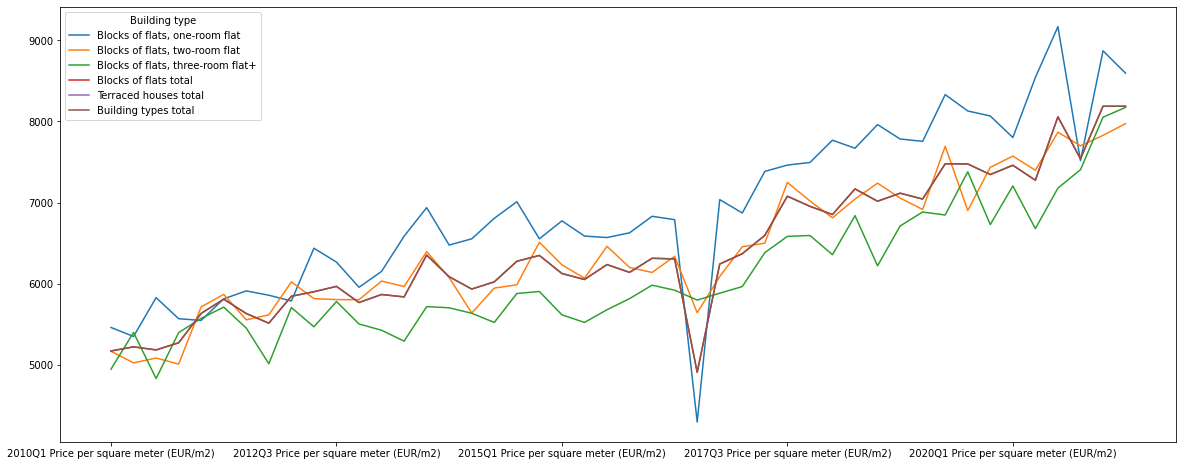

In [36]:
dfT["00100"].plot(figsize=(20,8))

# Missing data analysis

Replace `housing_type` with the type of housing in question

In [37]:
housing_types = dfT['00100'].columns
housing_types

Index(['Blocks of flats, one-room flat', 'Blocks of flats, two-room flat',
       'Blocks of flats, three-room flat+', 'Blocks of flats total',
       'Terraced houses total', 'Building types total'],
      dtype='object', name='Building type')

In [38]:
housing_type = 'Blocks of flats total'
df2 = df1.swaplevel().T[housing_type]
df2.head()

Postal code,00100,00120,00130,00140,00150,00160,00170,00180,00190,00200,...,99620,99660,99690,99710,99800,99830,99870,99930,99950,99980
2010Q1 Price per square meter (EUR/m2),5168.0,5618.0,5231.0,5766.0,5356.0,5553.0,5152.0,4828.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q2 Price per square meter (EUR/m2),5219.0,5495.0,5477.0,5950.0,5461.0,5248.0,5324.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q3 Price per square meter (EUR/m2),5181.0,5595.0,NaN,6123.0,5286.0,5278.0,5478.0,5298.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010Q4 Price per square meter (EUR/m2),5269.0,5521.0,5299.0,5521.0,5374.0,5293.0,5668.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q1 Price per square meter (EUR/m2),5632.0,5689.0,6294.0,6251.0,5738.0,5322.0,5701.0,5510.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution of missing values:

In [39]:
nan_df = pd.DataFrame(df2.isna().sum(), columns=["num_nans"])
nan_df.index.name = 'postal_code'
nan_df.head()

,num_nans
postal_code,
00100,0
00120,9
00130,8
00140,4
00150,8


array([[<AxesSubplot:title={'center':'num_nans'}>]], dtype=object)

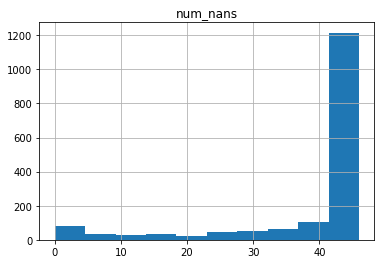

In [40]:
nan_df.hist()

In [41]:
locations = pd.read_csv("locations.csv")
locations.head()

,Unnamed: 0,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,0,100,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1714,24.9316,6.0
1,1,120,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1632,24.9391,6.0
2,2,130,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1645,24.9487,6.0
3,3,140,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1578,24.9525,6.0
4,4,150,FI,Helsinki,Uusimaa,1.0,Helsinki,11.0,Helsinki,91.0,60.1570,24.9369,6.0


In [42]:
locations.sort_values(by=['postal_code'], inplace=True)
nan_df.sort_index(inplace=True)

print(locations[['postal_code']].tail())
print(nan_df.tail())
print(locations.shape)
print(nan_df.shape)

      postal_code
1674        99830
1675        99870
1676        99930
1677        99950
1678        99980
             num_nans
postal_code          
99830              46
99870              46
99930              46
99950              46
99980              46
(1679, 13)
(1679, 1)


In [43]:
nan_df.reset_index(inplace=True)
nan_df["latitude"] = locations.latitude
nan_df['longitude'] = locations.longitude
nan_df['place_name'] = locations.place_name.str.strip()
nan_df.head()

,postal_code,num_nans,latitude,longitude,place_name
0,00100,0,60.1714,24.9316,Helsinki
1,00120,9,60.1632,24.9391,Helsinki
2,00130,8,60.1645,24.9487,Helsinki
3,00140,4,60.1578,24.9525,Helsinki
4,00150,8,60.1570,24.9369,Helsinki


In [44]:
# Helsinki example
hel_nan_df = nan_df[nan_df.place_name == "Helsinki"]
# BBox = ((hel_nan_df.longitude.min(), hel_nan_df.longitude.max(), 
#     hel_nan_df.latitude.min(), hel_nan_df.latitude.max()))
# BBox

# hel_img = plt.imread('/u/97/nguyenq10/unix/Courses/CS-C3250/notebooks/Bruce/map.png')

# fig, ax = plt.subplots(figsize = (10,15))
# ax.scatter(hel_nan_df.longitude, hel_nan_df.latitude, alpha=0.2, 
#            c=hel_nan_df.num_nans, cmap=plt.get_cmap("jet"),)
# ax.set_title('Plotting Spatial Data on Riyadh Map')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(hel_img, zorder=0, extent = BBox, aspect= 'equal')

No handles with labels found to put in legend.


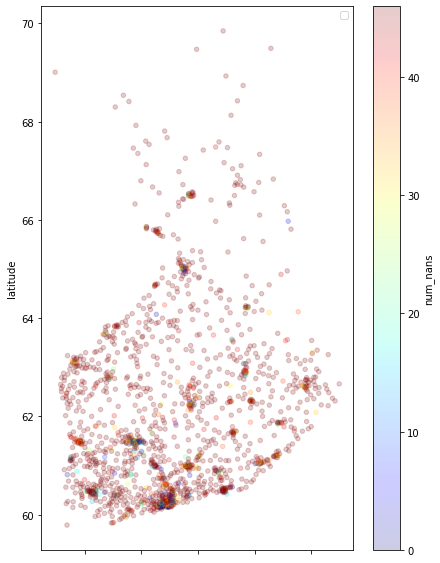

In [45]:
nan_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2, figsize=(7,10),
 c="num_nans", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.savefig('nice.pdf')

In [46]:
# random

loc1 = nan_df[['place_name','postal_code','longitude', 'latitude']]
loc1.set_index('postal_code', inplace=True)
loc1

,place_name,longitude,latitude
postal_code,,,
00100,Helsinki,24.9316,60.1714
00120,Helsinki,24.9391,60.1632
00130,Helsinki,24.9487,60.1645
00140,Helsinki,24.9525,60.1578
00150,Helsinki,24.9369,60.1570
...,...,...,...
99830,Saariselkä,27.3965,68.4230
99870,Inari,26.9896,68.9287
99930,Sevettijärvi,28.5786,69.4918


# Imputing

Let's try imputing some data

In [47]:
df2.columns[df2.isna().sum()/46 == 0]

Index(['00100', '00260', '00360', '00500', '00520', '00730', '00820', '01280',
       '01300', '01450', '02200', '02210', '02320', '02400', '02760', '03100',
       '04410', '06100', '20100', '20320', '20540', '20780', '20810', '21200',
       '23500', '24100', '26100', '33200', '33560', '33580', '33710', '33820',
       '33850', '33960', '36200', '37120', '40520'],
      dtype='object', name='Postal code')

In [48]:
df3 = df2[df2.columns[df2.isna().sum()/46 == 0]]
df3.index.name = 'time'
df3.columns.name = 'postal_code'
df3.head()

postal_code,00100,00260,00360,00500,00520,00730,00820,01280,01300,01450,...,33200,33560,33580,33710,33820,33850,33960,36200,37120,40520
time,,,,,,,,,,,,,,,,,,,,,
2010Q1 Price per square meter (EUR/m2),5168.0,4873.0,2756.0,4058.0,3317.0,3006.0,2652.0,2098.0,2616.0,1809.0,...,2827.0,1951.0,2152.0,1760.0,1859.0,1227.0,1897.0,1747.0,1613.0,1968.0
2010Q2 Price per square meter (EUR/m2),5219.0,5086.0,3051.0,4111.0,3706.0,3070.0,2561.0,2045.0,2688.0,2063.0,...,3094.0,1816.0,2039.0,1803.0,1970.0,1254.0,2026.0,1659.0,1542.0,2110.0
2010Q3 Price per square meter (EUR/m2),5181.0,4939.0,2889.0,4247.0,3672.0,2944.0,2632.0,2210.0,2814.0,2080.0,...,3001.0,2081.0,1978.0,1851.0,1916.0,1338.0,1700.0,1851.0,1582.0,2096.0
2010Q4 Price per square meter (EUR/m2),5269.0,4906.0,3037.0,4226.0,3681.0,3046.0,2580.0,2359.0,2727.0,2052.0,...,2990.0,1963.0,2102.0,1740.0,1980.0,1287.0,1881.0,1715.0,1745.0,2180.0
2011Q1 Price per square meter (EUR/m2),5632.0,5272.0,3188.0,4342.0,3654.0,3061.0,2793.0,2165.0,2734.0,2200.0,...,3122.0,2142.0,2181.0,1838.0,1851.0,1398.0,1847.0,1836.0,1660.0,2116.0


# Testing different imputation strategies

In [49]:
na_pct = 0.3

df_test = df3.mask(np.random.rand(*(df3.shape)) >= 1 - na_pct)
df_test.head()

postal_code,00100,00260,00360,00500,00520,00730,00820,01280,01300,01450,...,33200,33560,33580,33710,33820,33850,33960,36200,37120,40520
time,,,,,,,,,,,,,,,,,,,,,
2010Q1 Price per square meter (EUR/m2),5168.0,NaN,2756.0,4058.0,3317.0,NaN,NaN,2098.0,2616.0,NaN,...,NaN,NaN,NaN,1760.0,NaN,1227.0,1897.0,1747.0,1613.0,1968.0
2010Q2 Price per square meter (EUR/m2),5219.0,5086.0,3051.0,4111.0,3706.0,3070.0,NaN,2045.0,NaN,2063.0,...,NaN,1816.0,2039.0,1803.0,1970.0,NaN,NaN,1659.0,1542.0,NaN
2010Q3 Price per square meter (EUR/m2),NaN,4939.0,2889.0,4247.0,3672.0,NaN,2632.0,2210.0,2814.0,2080.0,...,3001.0,2081.0,NaN,NaN,1916.0,1338.0,1700.0,1851.0,1582.0,2096.0
2010Q4 Price per square meter (EUR/m2),5269.0,4906.0,3037.0,4226.0,NaN,3046.0,NaN,2359.0,2727.0,NaN,...,NaN,1963.0,NaN,NaN,1980.0,1287.0,NaN,1715.0,1745.0,NaN
2011Q1 Price per square meter (EUR/m2),5632.0,NaN,3188.0,4342.0,3654.0,NaN,NaN,NaN,NaN,2200.0,...,3122.0,NaN,NaN,1838.0,NaN,1398.0,1847.0,1836.0,1660.0,NaN


<AxesSubplot:>

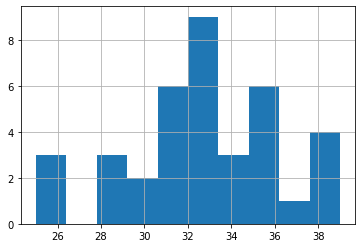

In [50]:
# histogram of no. of available values
df_test.notna().sum(axis=0).hist()

## Iterative Imputation

In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

ite_imputer = IterativeImputer(max_iter=30, random_state=0)
ite_imputed = ite_imputer.fit_transform(df_test)

In [52]:
from sklearn.metrics import mean_squared_error

# error by column
ite_err = pd.DataFrame(mean_squared_error(df3, ite_imputed, multioutput='raw_values'),index=df3.columns,columns=['iterative_mse_error'])
print("Total MSE:", ite_err.sum())

Total MSE: iterative_mse_error    619190.104648
dtype: float64


<AxesSubplot:xlabel='place_name'>

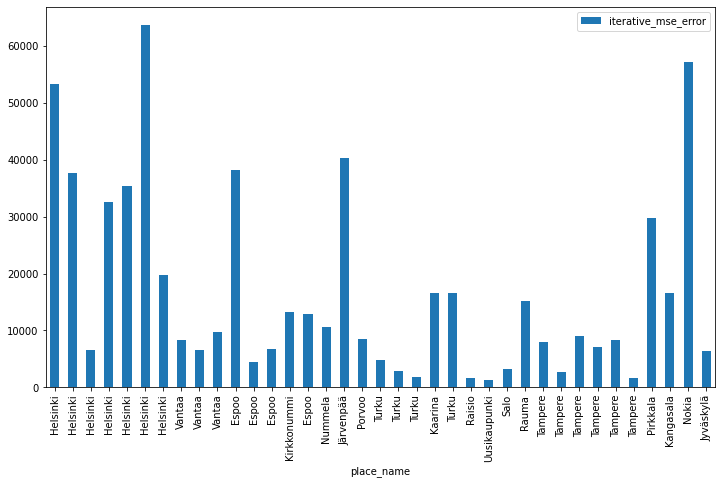

In [53]:
ite_err_df = pd.merge(ite_err, loc1, how="inner",on='postal_code')
ite_err_df.plot.bar(x='place_name', y='iterative_mse_error', figsize=(12,7))

## KNN imputer

In [67]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(df_test)

knn_err = pd.DataFrame(mean_squared_error(df3, knn_imputed, multioutput='raw_values'),index=df3.columns,columns=['knn_mse_error'])
print("Total MSE:", knn_err.sum())

Total MSE: knn_mse_error    362084.073043
dtype: float64


In [72]:
df_test

postal_code,00100,00260,00360,00500,00520,00730,00820,01280,01300,01450,...,33200,33560,33580,33710,33820,33850,33960,36200,37120,40520
time,,,,,,,,,,,,,,,,,,,,,
2010Q1 Price per square meter (EUR/m2),5168.0,NaN,2756.0,4058.0,3317.0,NaN,NaN,2098.0,2616.0,NaN,...,NaN,NaN,NaN,1760.0,NaN,1227.0,1897.0,1747.0,1613.0,1968.0
2010Q2 Price per square meter (EUR/m2),5219.0,5086.0,3051.0,4111.0,3706.0,3070.0,NaN,2045.0,NaN,2063.0,...,NaN,1816.0,2039.0,1803.0,1970.0,NaN,NaN,1659.0,1542.0,NaN
2010Q3 Price per square meter (EUR/m2),NaN,4939.0,2889.0,4247.0,3672.0,NaN,2632.0,2210.0,2814.0,2080.0,...,3001.0,2081.0,NaN,NaN,1916.0,1338.0,1700.0,1851.0,1582.0,2096.0
2010Q4 Price per square meter (EUR/m2),5269.0,4906.0,3037.0,4226.0,NaN,3046.0,NaN,2359.0,2727.0,NaN,...,NaN,1963.0,NaN,NaN,1980.0,1287.0,NaN,1715.0,1745.0,NaN
2011Q1 Price per square meter (EUR/m2),5632.0,NaN,3188.0,4342.0,3654.0,NaN,NaN,NaN,NaN,2200.0,...,3122.0,NaN,NaN,1838.0,NaN,1398.0,1847.0,1836.0,1660.0,NaN
2011Q2 Price per square meter (EUR/m2),5807.0,5538.0,3070.0,4281.0,NaN,2840.0,2717.0,2227.0,2869.0,2277.0,...,3107.0,2125.0,2228.0,1953.0,NaN,1257.0,1926.0,1561.0,NaN,2213.0
2011Q3 Price per square meter (EUR/m2),NaN,5166.0,NaN,4420.0,4285.0,NaN,2723.0,2123.0,NaN,NaN,...,3127.0,2219.0,2179.0,NaN,1814.0,1313.0,1783.0,NaN,1711.0,NaN
2011Q4 Price per square meter (EUR/m2),5511.0,5262.0,3052.0,4459.0,3898.0,2969.0,2663.0,2454.0,2667.0,2207.0,...,2890.0,2198.0,NaN,NaN,1749.0,1338.0,2043.0,1709.0,1577.0,2032.0
2012Q1 Price per square meter (EUR/m2),5843.0,5122.0,NaN,4429.0,3854.0,NaN,2765.0,2358.0,NaN,2332.0,...,2756.0,NaN,NaN,NaN,1586.0,1316.0,2189.0,1822.0,1725.0,2127.0


In [74]:
knn_imputed[:7]

array([[5168. , 5146.2, 2756. , 4058. , 3317. , 3021.6, 2738.6, 2098. ,
        2616. , 2165.4, 3285. , 2727. , 2616. , 2329. , 2485.6, 2026.6,
        2072. , 2582.6, 2420. , 1640. , 1660. , 1512.4, 2488. , 1450. ,
         847. , 1468. , 1314. , 3065. , 2036.6, 2184.2, 1760. , 1840.2,
        1227. , 1897. , 1747. , 1613. , 1968. ],
       [5219. , 5086. , 3051. , 4111. , 3706. , 3070. , 2715.8, 2045. ,
        2738.6, 2063. , 3266. , 2646. , 2691. , 2086. , 2370. , 1879. ,
        2089. , 2594. , 2472. , 1643. , 1589. , 1508. , 2438. , 1502.6,
         822. , 1468. , 1422. , 3049.4, 1816. , 2039. , 1803. , 1970. ,
        1317.6, 1882.6, 1659. , 1542. , 2113.2],
       [5359.8, 4939. , 2889. , 4247. , 3672. , 2995.8, 2632. , 2210. ,
        2814. , 2080. , 3515. , 2652. , 2588. , 2105. , 2485.6, 2006.8,
        2191.2, 2576. , 2448. , 1651. , 1680. , 1789. , 2414. , 1518. ,
         838. , 1460. , 1428. , 3001. , 2081. , 2218.2, 1851.6, 1916. ,
        1338. , 1700. , 1851. , 1582. 

<AxesSubplot:xlabel='place_name'>

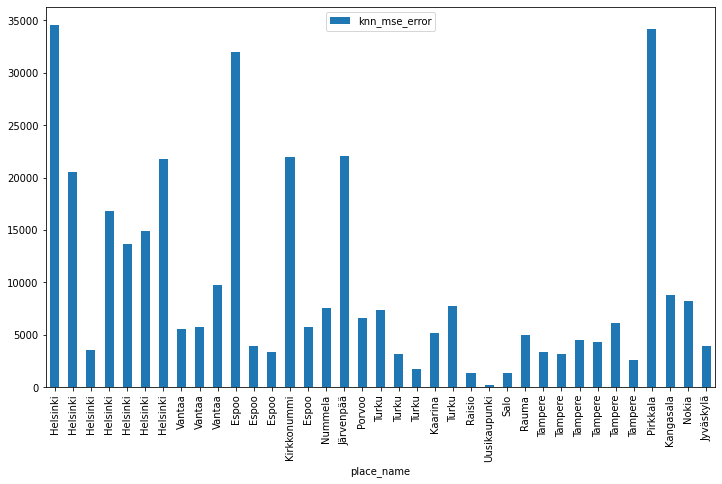

In [58]:
knn_err_df = pd.merge(knn_err, loc1, how="inner",on='postal_code')
knn_err_df.plot.bar(x='place_name', y='knn_mse_error', figsize=(12,7))

## Interpolation

In [29]:
interpolate_imputed = df_test.interpolate(aixs=1).fillna(method='backfill', axis=1)

interpolate_err = pd.DataFrame(mean_squared_error(df3, interpolate_imputed, multioutput='raw_values'),index=df3.columns,columns=['interpolation_mse_error'])
print(interpolate_err.sum())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<AxesSubplot:xlabel='place_name'>

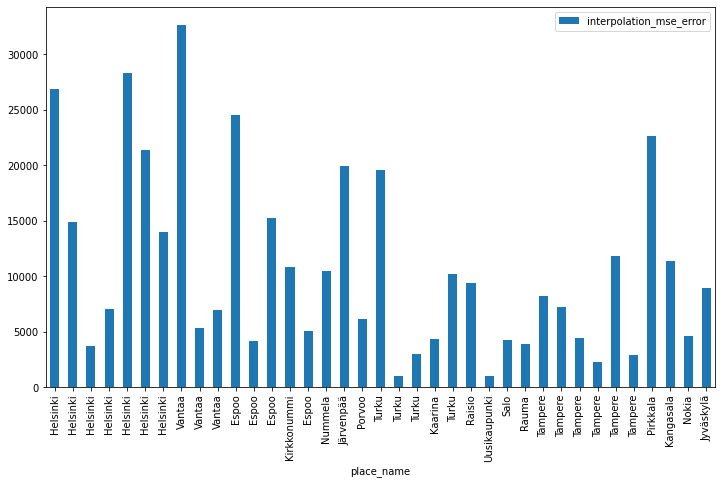

In [ ]:
interpolate_err_df = pd.merge(interpolate_err, loc1, how="inner",on='postal_code')
interpolate_err_df.plot.bar(x='place_name', y='interpolation_mse_error', figsize=(12,7))

In [ ]:
interpolate_err_df.columns

Index(['interpolation_mse_error', 'place_name', 'longitude', 'latitude'], dtype='object')

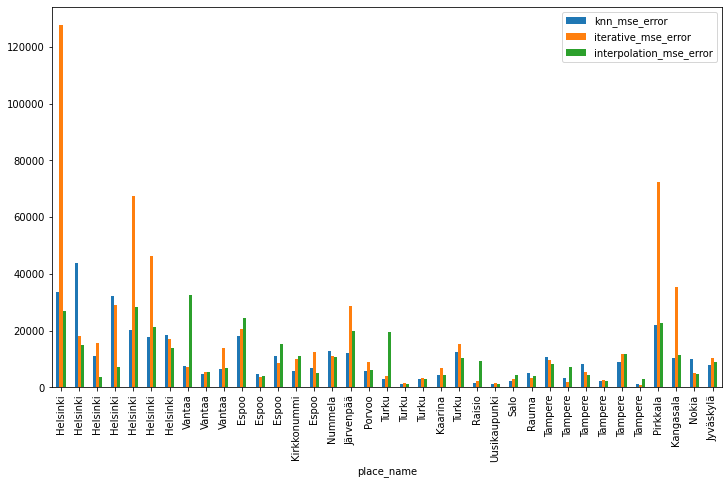

In [ ]:
all_df = pd.merge(knn_err_df, ite_err_df[['iterative_mse_error']],how='inner', on='postal_code')
all_df = pd.merge(all_df, interpolate_err_df[['interpolation_mse_error']],how='inner', on='postal_code')
# all_df.rename(columns={'mse_error_x':'knn_mse_error','mse_error_y':'iterative_imputer_mse_error'},inplace=True)
all_df.plot.bar(x='place_name', y=['knn_mse_error','iterative_mse_error', 'interpolation_mse_error'], figsize=(12,7))
plt.savefig('imputation_effectiveness.pdf')

In [ ]:
df3.to_csv("no_nans.csv",index=True)

## Side-quest: Get locations with the most non-nan values

In [31]:
df1.notna().groupby(level=[0]).sum().sum(axis=1)[440:]

Postal code
20100    276
20200    117
20210    122
20240     87
20250      0
        ... 
99830      4
99870      0
99930      0
99950      0
99980      0
Length: 1239, dtype: int64

In [32]:
dfT["20100"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 2010Q1 Price per square meter (EUR/m2) to 2021Q2* Price per square meter (EUR/m2)
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Blocks of flats, one-room flat     46 non-null     float64
 1   Blocks of flats, two-room flat     46 non-null     float64
 2   Blocks of flats, three-room flat+  46 non-null     float64
 3   Blocks of flats total              46 non-null     float64
 4   Terraced houses total              46 non-null     float64
 5   Building types total               46 non-null     float64
dtypes: float64(6)
memory usage: 3.6+ KB


In [39]:
locations.postal_code

0         100
1         120
2         130
3         140
4         150
        ...  
1674    99830
1675    99870
1676    99930
1677    99950
1678    99980
Name: postal_code, Length: 1679, dtype: int64

In [40]:
locations[locations.postal_code == 20100]

,Unnamed: 0,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
440,440,20100,FI,Turku,Southwest Finland,2.0,Turku,23.0,Turku,853.0,60.4449,22.2261,NaN


In [41]:
dfT["20100"].to_csv("20100.csv")